# Импорт библиотек

Стандартные библиотеки

In [1]:
%pip install --upgrade pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from numpy import array, linspace, radians, degrees

Частные библиотеки

In [3]:
%pip install --upgrade git+https://github.com/ParkhomenkoDV/foil.git

  Cloning https://github.com/ParkhomenkoDV/foil.git to c:\users\parkh\appdata\local\temp\pip-req-build-ny4d154n
  Resolved https://github.com/ParkhomenkoDV/foil.git to commit 9a910e07c23db481bdabb286114766a476a076e1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Cloning https://github.com/ParkhomenkoDV/decorators.git (to revision master) to c:\users\parkh\appdata\local\temp\pip-install-e8mo37x1\decorators_51b1ac969af8497a8dd97f8635a2a4f1
  Resolved https://github.com/ParkhomenkoDV/decorators.git to commit f947e73c416d14a84afc0f4a1787e9ca34621de1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Cloning https://github.com/ParkhomenkoDV/mathematics.git (to revision master) to c:\users\parkh\appdata\local\temp\pip-install-e8mo37x1\mathematics_985f5c0f5a344ed5b7a9a2570490c638
  Resolved https://github.com/ParkhomenkoDV/mathematics.git to commit 8e825e6f68ea7f82af71e3c67bed24907c9f

  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/foil.git 'C:\Users\parkh\AppData\Local\Temp\pip-req-build-ny4d154n'
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/decorators.git 'C:\Users\parkh\AppData\Local\Temp\pip-install-e8mo37x1\decorators_51b1ac969af8497a8dd97f8635a2a4f1'
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/mathematics.git 'C:\Users\parkh\AppData\Local\Temp\pip-install-e8mo37x1\mathematics_985f5c0f5a344ed5b7a9a2570490c638'


In [2]:
from foil import Foil

In [3]:
help(Foil)

Help on class Foil in module foil.foil:

class Foil(builtins.object)
 |  Foil(method: str, discreteness: int = 30, relative_step: float | int = 1.0, installation_angle: float | int = 0.0, name: str = '2024-11-13-11-53-01', **parameters)
 |  
 |  Относительный профиль
 |  
 |  Methods defined here:
 |  
 |  __init__(self, method: str, discreteness: int = 30, relative_step: float | int = 1.0, installation_angle: float | int = 0.0, name: str = '2024-11-13-11-53-01', **parameters)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __setattr__(self, key, value)
 |      При установке новых атрибутов расчет обнуляется
 |  
 |  __str__(self) -> str
 |      Return str(self).
 |  
 |  cfd(self, vx, vy, padding=0.2, xlim=None, ylim=None)
 |      Продувка
 |  
 |  function_lower(self, kind, fill_value='extrapolate') -> scipy.interpolate._interpolate.interp1d
 |      Функция корыта аэродинамического профиля
 |  
 |  function_upper(self, kind, fill_value='extrapolate') -

# Моделирование профиля 

Количество значащих цифр

In [4]:
Foil.rnd

In [5]:
Foil.rnd = 6

In [5]:
Foil.methods

## BMSTU

In [10]:
foil_bmstu = Foil('BMSTU', 30, 1 / 1.698, radians(46.23),
                  rotation_angle=radians(70),
                  relative_inlet_radius=0.06, relative_outlet_radius=0.03,
                  inlet_angle=radians(20), outlet_angle=radians(10),
                  x_ray_cross=0.4,
                  upper_proximity=0.5)

"properties" elapsed 0.2057 seconds


Channel calculation: 100%|██████████| 32/32 [00:00<00:00, 150.96it/s]


"channel" elapsed 0.4237 seconds
"properties" elapsed 0.0 seconds


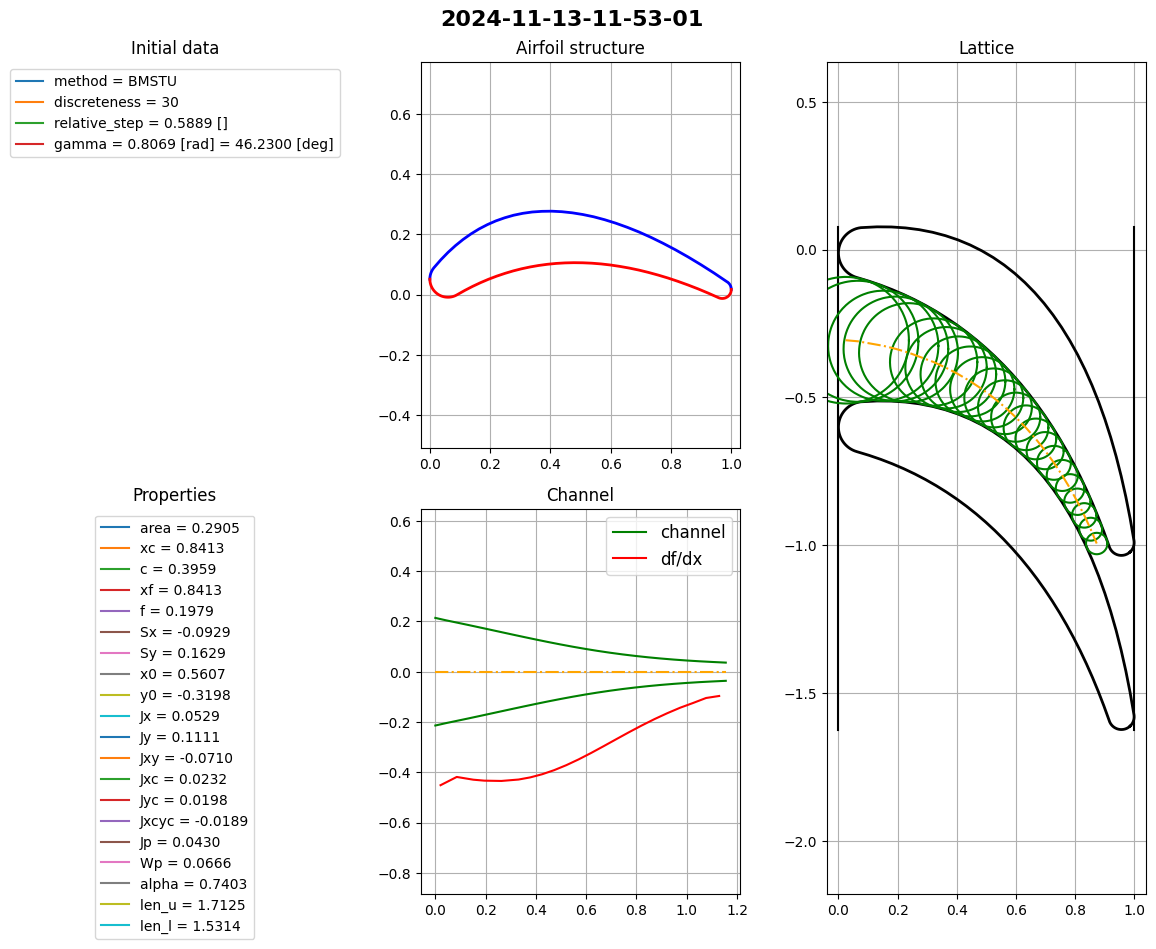

In [11]:
foil_bmstu.show()

In [12]:
foil_bmstu.properties

"properties" elapsed 0.0 seconds


{'area': 0.29051386874902874,
 'xc': np.float64(0.8412841284128413),
 'c': np.float64(0.39587663900959946),
 'xf': np.float64(0.8412841284128413),
 'f': np.float64(0.19793831950479973),
 'Sx': -0.09291400852028513,
 'Sy': 0.16290074676477942,
 'x0': 0.5607331156555122,
 'y0': -0.3198264128331593,
 'Jx': 0.05292396198650218,
 'Jy': 0.11113096136445706,
 'Jxy': -0.070997873013844,
 'Jxc': 0.023207607939509784,
 'Jyc': 0.019787118088432698,
 'Jxcyc': -0.018897911528221713,
 'Jp': 0.04299472602794248,
 'Wp': np.float64(0.06660363499114186),
 'alpha': np.float64(0.7402715177881605),
 'len_u': 1.7125027438580793,
 'len_l': 1.5313554003470644}

CFD: 100%|██████████| 179/179 [00:00<00:00, 2693.58it/s]


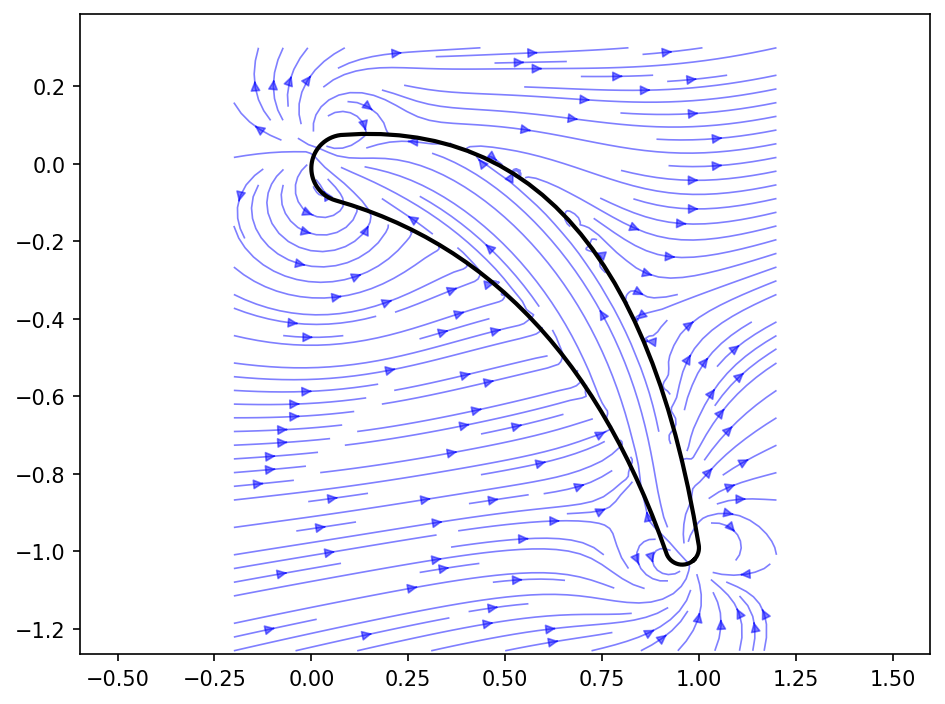

In [13]:
foil_bmstu.cfd(10, 5)

In [14]:
foil_bmstu.coordinates

((0.9866944883210124, -1.0222371516862696),
 (0.987674159588808, -1.0212682150474905),
 (0.9886224111360565, -1.0202685085875463),
 (0.9895382770373304, -1.0192390506458135),
 (0.9904208243564652, -1.0181808898676699),
 (0.9912691540968822, -1.0170951041363043),
 (0.9920824021173431, -1.0159827994747435),
 (0.9928597400121951, -1.0148451089192145),
 (0.9936003759552189, -1.0136831913649902),
 (0.9943035555062113, -1.0124982303858945),
 (0.9949685623794885, -1.0112914330286686),
 (0.9955947191735213, -1.0100640285834266),
 (0.9961813880609626, -1.0088172673314535),
 (0.9967279714383629, -1.0075524192716208),
 (0.9972339125349121, -1.0062707728267164),
 (0.9976986959795873, -1.0049736335310087),
 (0.9981218483261298, -1.0036623227003783),
 (0.9985029385353157, -1.002338176086375),
 (0.9988415784140285, -1.0010025425155713),
 (0.9991374230106888, -0.9996567825155934),
 (0.9993901709666331, -0.9983022669292382),
 (0.9995995648230912, -0.9969403755180783),
 (0.999765391283443, -0.9955724955

In [15]:
foil_bmstu.to_dataframe()

,x,y
0,0.986694,-1.022237
1,0.987674,-1.021268
2,0.988622,-1.020269
3,0.989538,-1.019239
4,0.990421,-1.018181
...,...,...
174,0.977525,-1.028950
175,0.979979,-1.027502
176,0.982332,-1.025896
177,0.984574,-1.024139


In [16]:
foil_bmstu.write('txt')

"properties" elapsed 0.0 seconds


## NACA

In [4]:
foil_naca = Foil('NACA', 40, 1 / 1.698, radians(46.23),
                    relative_thickness = 0.2,
                    x_relative_camber = 0.3,
                    relative_camber = 0.05,
                    closed = True)

"properties" elapsed 0.0682 seconds


Channel calculation: 100%|██████████| 43/43 [00:00<00:00, 147.08it/s]


"channel" elapsed 0.3807 seconds
"properties" elapsed 0.0 seconds


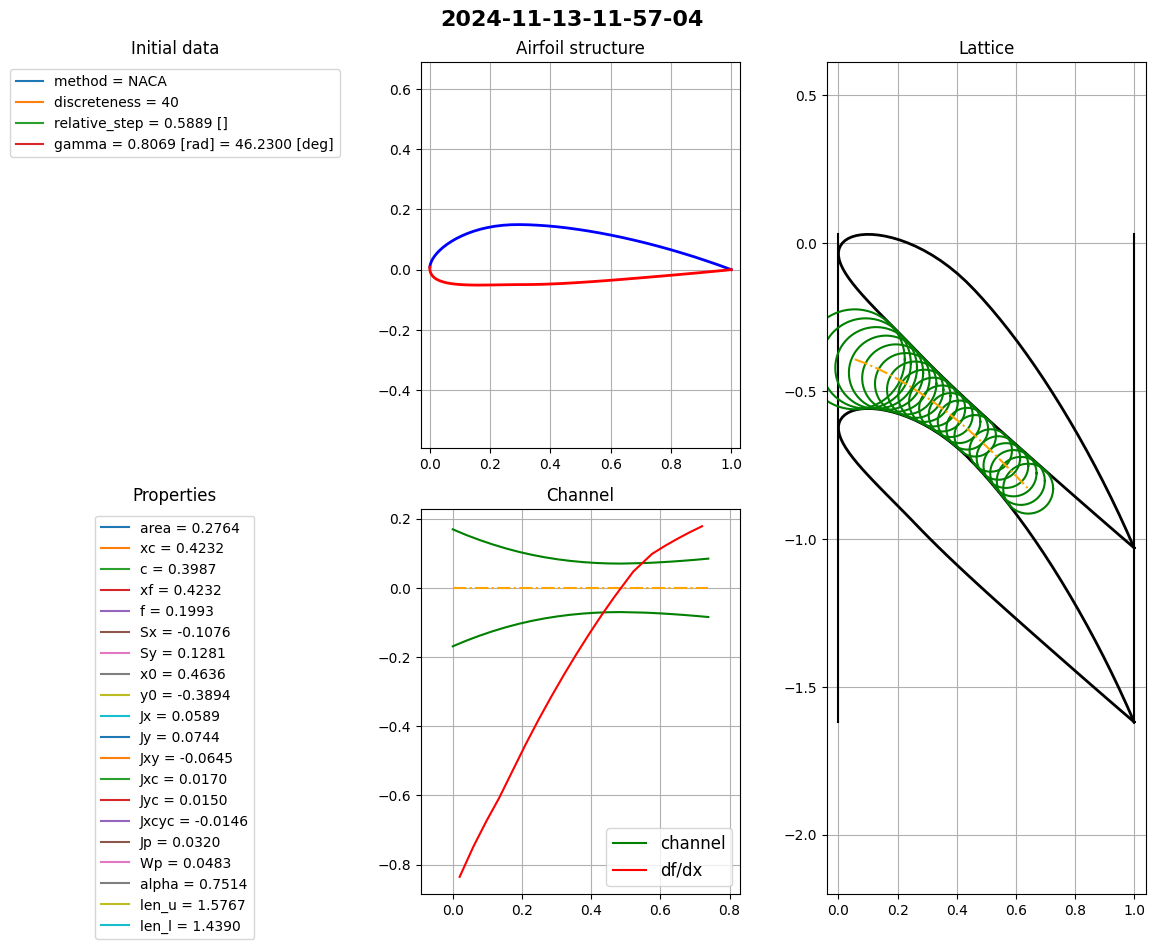

In [5]:
foil_naca.show()

In [6]:
foil_naca.properties

"properties" elapsed 0.0 seconds


{'area': 0.27635234117268553,
 'xc': np.float64(0.42324232423242325),
 'c': np.float64(0.3986917398638531),
 'xf': np.float64(0.42324232423242325),
 'f': np.float64(0.19934586993192654),
 'Sx': -0.10761095230819542,
 'Sy': 0.12811444919347065,
 'x0': 0.4635909674216047,
 'y0': -0.38939765030234386,
 'Jx': 0.058902373446129294,
 'Jy': 0.07440026303103309,
 'Jxy': -0.06450376816299808,
 'Jxc': 0.016998921470520408,
 'Jyc': 0.015007561588746006,
 'Jxcyc': -0.014616302677281597,
 'Jp': 0.03200648305926641,
 'Wp': np.float64(0.048286434444470575),
 'alpha': np.float64(0.7513901079023984),
 'len_u': 1.5766958039720214,
 'len_l': 1.438975862369137}

CFD: 100%|██████████| 79/79 [00:00<00:00, 794.78it/s]


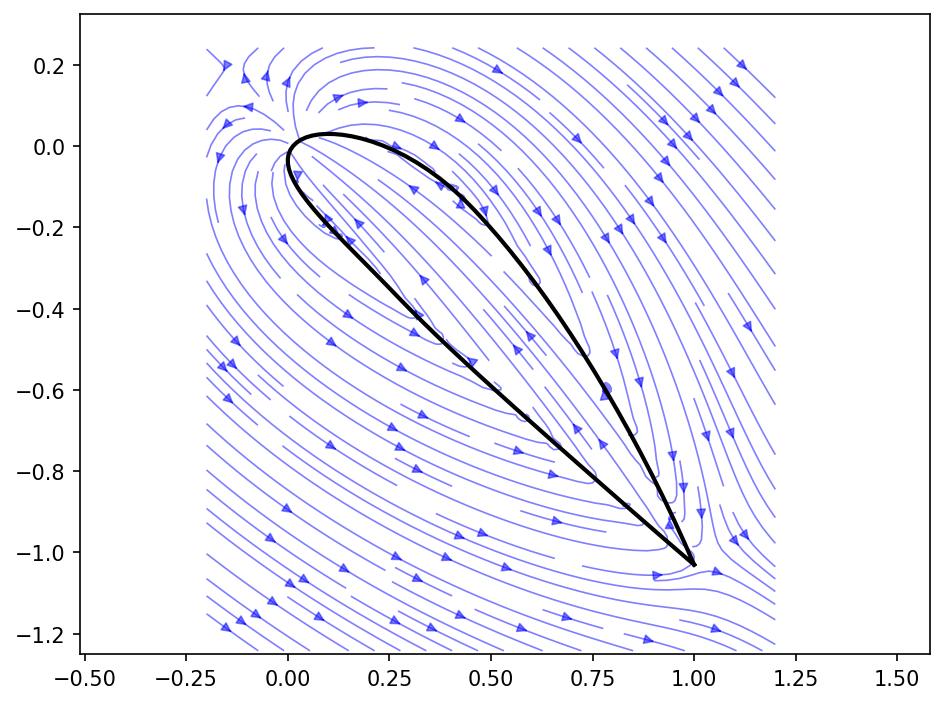

In [7]:
foil_naca.cfd(10,-8)

In [8]:
foil_naca.coordinates

((0.9999999999999999, -1.0303733199950584),
 (0.9748248862855157, -0.973059786525128),
 (0.9489149077287694, -0.9166746892715103),
 (0.9223477189935776, -0.8612683242971072),
 (0.8951982544362902, -0.8068941774115271),
 (0.8675383491955971, -0.7536091328830387),
 (0.8394365368805027, -0.7014734736775083),
 (0.8109580172346161, -0.650550681406847),
 (0.7821647824649709, -0.600907049673284),
 (0.7531158866611913, -0.5526111294981148),
 (0.7238678390025591, -0.5057330298997373),
 (0.6944750983474451, -0.460343600329062),
 (0.6649906443950002, -0.4165135244948866),
 (0.6354665989568082, -0.3743123570544454),
 (0.6059548700095092, -0.33380753566623833),
 (0.5765077911299169, -0.29506340098962136),
 (0.5471787296320787, -0.25814025637992044),
 (0.5180226382001437, -0.22309349730508135),
 (0.489096526990895, -0.18997283795969466),
 (0.46045983599579654, -0.1588216592558787),
 (0.4319646279666143, -0.1298777304310877),
 (0.4032063820359302, -0.10362011468459485),
 (0.3743207525229132, -0.08000

In [9]:
foil_naca.to_dataframe()

,x,y
0,1.000000,-1.030373
1,0.974825,-0.973060
2,0.948915,-0.916675
3,0.922348,-0.861268
4,0.895198,-0.806894
...,...,...
74,0.829950,-0.883238
75,0.872133,-0.920022
76,0.914565,-0.956866
77,0.957200,-0.993682


In [10]:
foil_naca.write('txt')

"properties" elapsed 0.0 seconds


## MYNK

In [11]:
foil_mynk = Foil('MYNK', 20, 1 / 1.698, radians(46.23),
                 mynk_coefficient=0.2)

"properties" elapsed 0.0492 seconds


Channel calculation: 100%|██████████| 21/21 [00:00<00:00, 152.97it/s]

"channel" elapsed 0.1928 seconds


"properties" elapsed 0.0 seconds


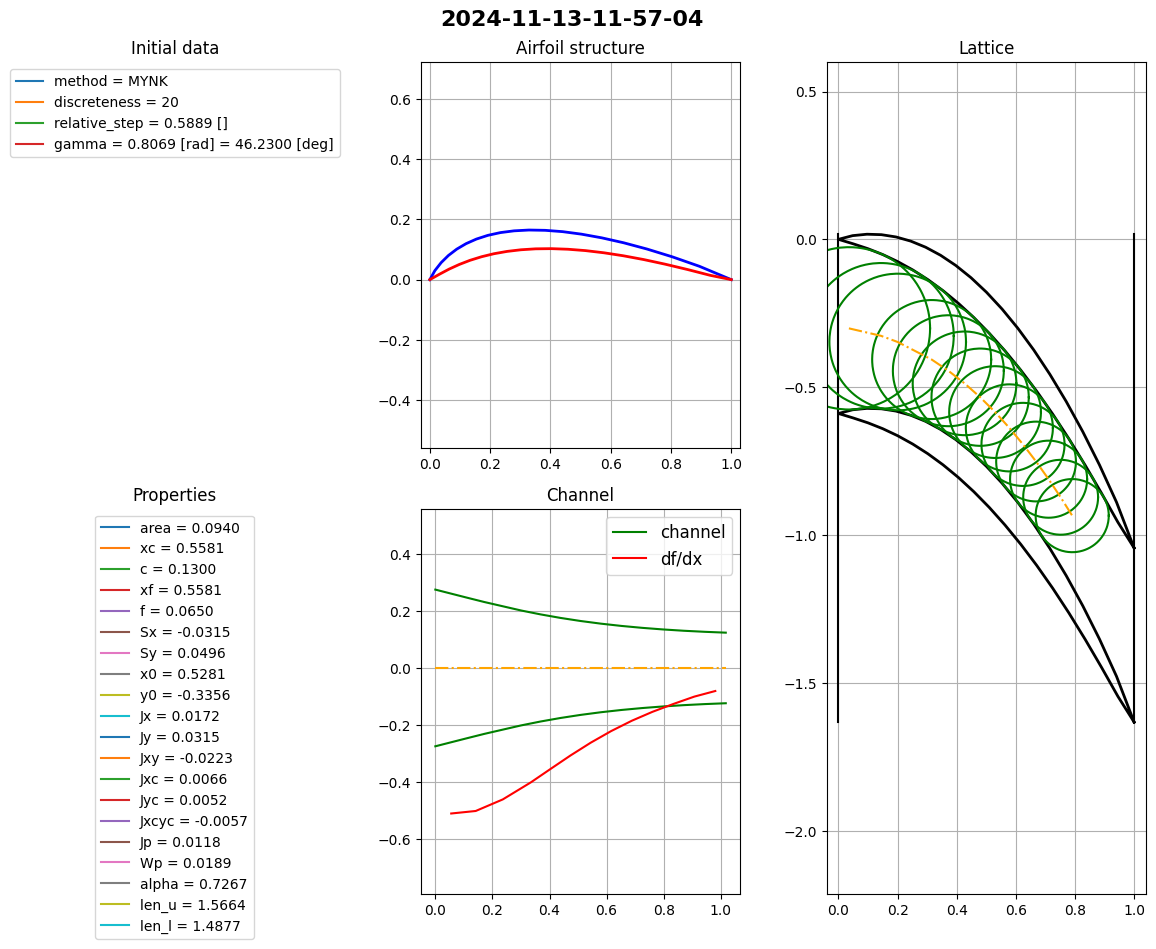

In [12]:
foil_mynk.show()

In [13]:
foil_mynk.properties

"properties" elapsed 0.0 seconds


{'area': 0.09396776491278673,
 'xc': np.float64(0.5580558055805581),
 'c': np.float64(0.13004347400191874),
 'xf': np.float64(0.5580558055805581),
 'f': np.float64(0.06502173700095937),
 'Sx': -0.03153184882551968,
 'Sy': 0.04962244305721887,
 'x0': 0.5280794228028559,
 'y0': -0.33556027276784745,
 'Jx': 0.017160407126348316,
 'Jy': 0.031450855582253794,
 'Jxy': -0.022303424059805614,
 'Jxc': 0.006579571333582402,
 'Jyc': 0.005246264494530067,
 'Jxcyc': -0.005652103532118272,
 'Jp': 0.011825835828112469,
 'Wp': np.float64(0.018900939588121234),
 'alpha': np.float64(0.7266954573853913),
 'len_u': 1.5664389226189268,
 'len_l': 1.487745328488906}

CFD: 100%|██████████| 39/39 [00:00<00:00, 7796.48it/s]


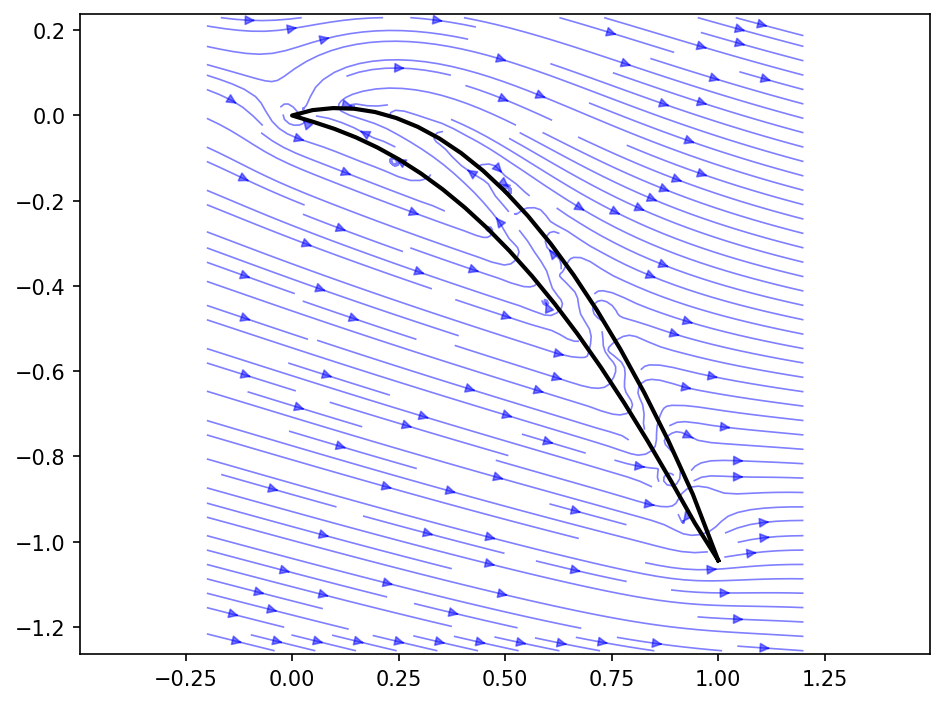

In [14]:
foil_mynk.cfd(10, -2)

In [15]:
foil_mynk.coordinates

((1.0, -1.043883921460576),
 (0.9404457092773026, -0.8890521134330979),
 (0.8828968401400245, -0.7631573274356885),
 (0.8262530466702168, -0.6503222365761395),
 (0.7703724831016106, -0.5485000921342627),
 (0.7151867481829479, -0.4567039053746637),
 (0.6606513365293333, -0.3742914904783863),
 (0.6067324568871184, -0.3007752600681184),
 (0.5534020546384214, -0.2357504029552297),
 (0.5006355418893846, -0.17886213068456538),
 (0.44841063863710295, -0.12978895627324347),
 (0.39670674767162484, -0.08823367442415624),
 (0.3455046273515259, -0.0539186398751598),
 (0.29478626765949845, -0.026583978956108856),
 (0.24453495567657252, -0.005988534342308346),
 (0.19473560258036363, 0.008085416558298192),
 (0.1453755873373571, 0.015819987635137072),
 (0.0964469887083924, 0.017329477584181897),
 (0.04795430654917471, 0.012548956205908467),
 (0.0, 0.0),
 (0.04987055912764713, -0.015101410919678785),
 (0.09983892464833856, -0.031614109007492903),
 (0.1500411371570787, -0.051501077869107785),
 (0.200515

In [16]:
foil_mynk.to_dataframe()

,x,y
0,1.000000,-1.043884
1,0.940446,-0.889052
2,0.882897,-0.763157
3,0.826253,-0.650322
4,0.770372,-0.548500
5,0.715187,-0.456704
6,0.660651,-0.374291
7,0.606732,-0.300775
8,0.553402,-0.235750
9,0.500636,-0.178862


In [17]:
foil_mynk.write('txt')

"properties" elapsed 0.0 seconds


## PARSEC

In [19]:
foil_parsec = Foil('PARSEC', 50, 1 / 1.698, radians(46.23),
                      relative_inlet_radius = 0.06,
                      x_relative_camber_upper=0.35, x_relative_camber_lower = 0.45,
                      relative_camber_upper=0.055, relative_camber_lower = -0.006,
                      d2y_dx2_upper=-0.35, d2y_dx2_lower = -0.2,
                      theta_outlet_upper=radians(-6), theta_outlet_lower = radians(0.05))

"properties" elapsed 0.0477 seconds


Channel calculation: 100%|██████████| 52/52 [00:00<00:00, 136.72it/s]


"channel" elapsed 0.4381 seconds
"properties" elapsed 0.0 seconds


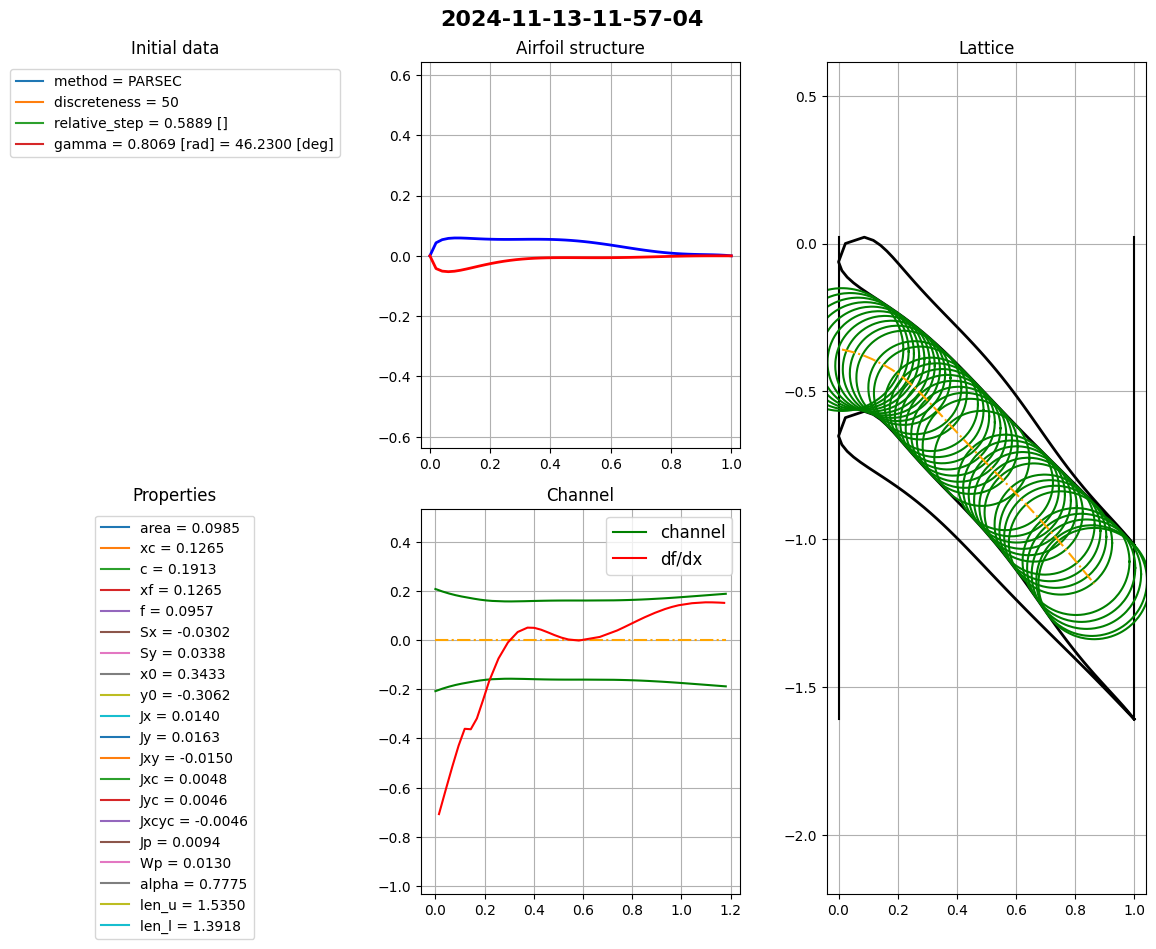

In [20]:
foil_parsec.show()

In [21]:
foil_parsec.properties

"properties" elapsed 0.0 seconds


{'area': 0.09846727427897439,
 'xc': np.float64(0.1265126512651265),
 'c': np.float64(0.19133259229501695),
 'xf': np.float64(0.1265126512651265),
 'f': np.float64(0.09566629614750848),
 'Sx': -0.030152832543065528,
 'Sy': 0.0338055695058471,
 'x0': 0.34331781552183743,
 'y0': -0.3062218667456709,
 'Jx': 0.01402791595445197,
 'Jy': 0.016255355690834965,
 'Jxy': -0.014968390122687653,
 'Jxc': 0.00479445928544483,
 'Jyc': 0.004649301415615897,
 'Jxcyc': -0.004616385522206626,
 'Jp': 0.009443760701060728,
 'Wp': np.float64(0.013033586771766649),
 'alpha': np.float64(0.7775377978169954),
 'len_u': 1.5350482500464164,
 'len_l': 1.3917546178683613}

CFD: 100%|██████████| 99/99 [00:00<00:00, 103.51it/s]


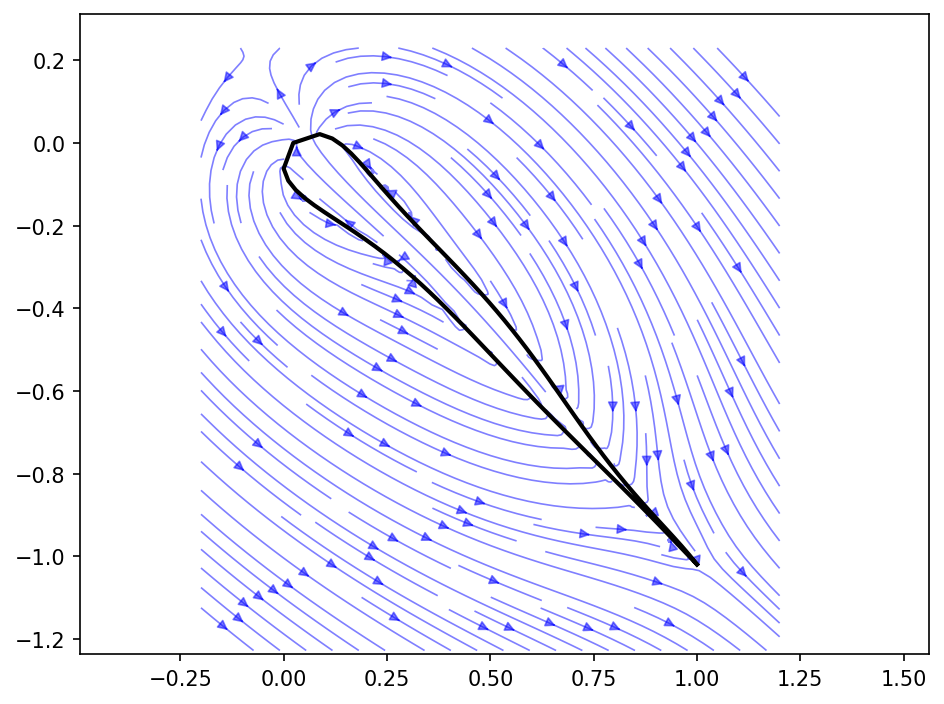

In [22]:
foil_parsec.cfd(5, -5)

In [23]:
foil_parsec.coordinates

((1.0, -1.0196905265026146),
 (0.9818257826929145, -0.997193585190232),
 (0.9629861634483989, -0.9753340729288683),
 (0.9437282577272986, -0.9538752627647256),
 (0.9242572621484402, -0.9326205843564009),
 (0.904739924186157, -0.911410300140258),
 (0.8853079254426534, -0.8901182642877266),
 (0.86606117646801, -0.8686487663965028),
 (0.8470710209640021, -0.8469334619885194),
 (0.8283833470558043, -0.8249283920332453),
 (0.8100216031468843, -0.8026110938765616),
 (0.7919897156834944, -0.7799778061364115),
 (0.7742749059433667, -0.7570407703293126),
 (0.7568504027246508, -0.733825632220374),
 (0.739678047541095, -0.710368946148126),
 (0.7227107886224853, -0.6867157858695706),
 (0.7058950596684228, -0.6629174658070278),
 (0.6891730389003881, -0.6390293769645455),
 (0.6724847834909428, -0.6151089422281424),
 (0.6557702339070184, -0.5912136962832689),
 (0.6389710820697236, -0.5673994959907247),
 (0.6220324964850397, -0.5437188677788711),
 (0.6049046966110341, -0.5202194994613714),
 (0.5875443

In [24]:
foil_parsec.to_dataframe()

,x,y
0,1.000000,-1.019691
1,0.981826,-0.997194
2,0.962986,-0.975334
3,0.943728,-0.953875
4,0.924257,-0.932621
...,...,...
94,0.920270,-0.936441
95,0.940247,-0.957210
96,0.960172,-0.978030
97,0.980075,-0.998871


In [25]:
foil_parsec.write('txt')

"properties" elapsed 0.0 seconds


## BEZIER

In [26]:
points = ((1.0, 0.0), (0.35, 0.200), (0.05, 0.100), 
          (0.0, 0.0), 
          (0.05, -0.10), (0.35, -0.05), (0.5, 0.0), (1.0, 0.0))

In [27]:
foil_bezier = Foil('BEZIER', 30, 1 / 1.698, radians(46.23), points=points)

"properties" elapsed 0.0716 seconds


Channel calculation: 100%|██████████| 32/32 [00:00<00:00, 139.55it/s]


"channel" elapsed 0.3082 seconds
"properties" elapsed 0.0 seconds


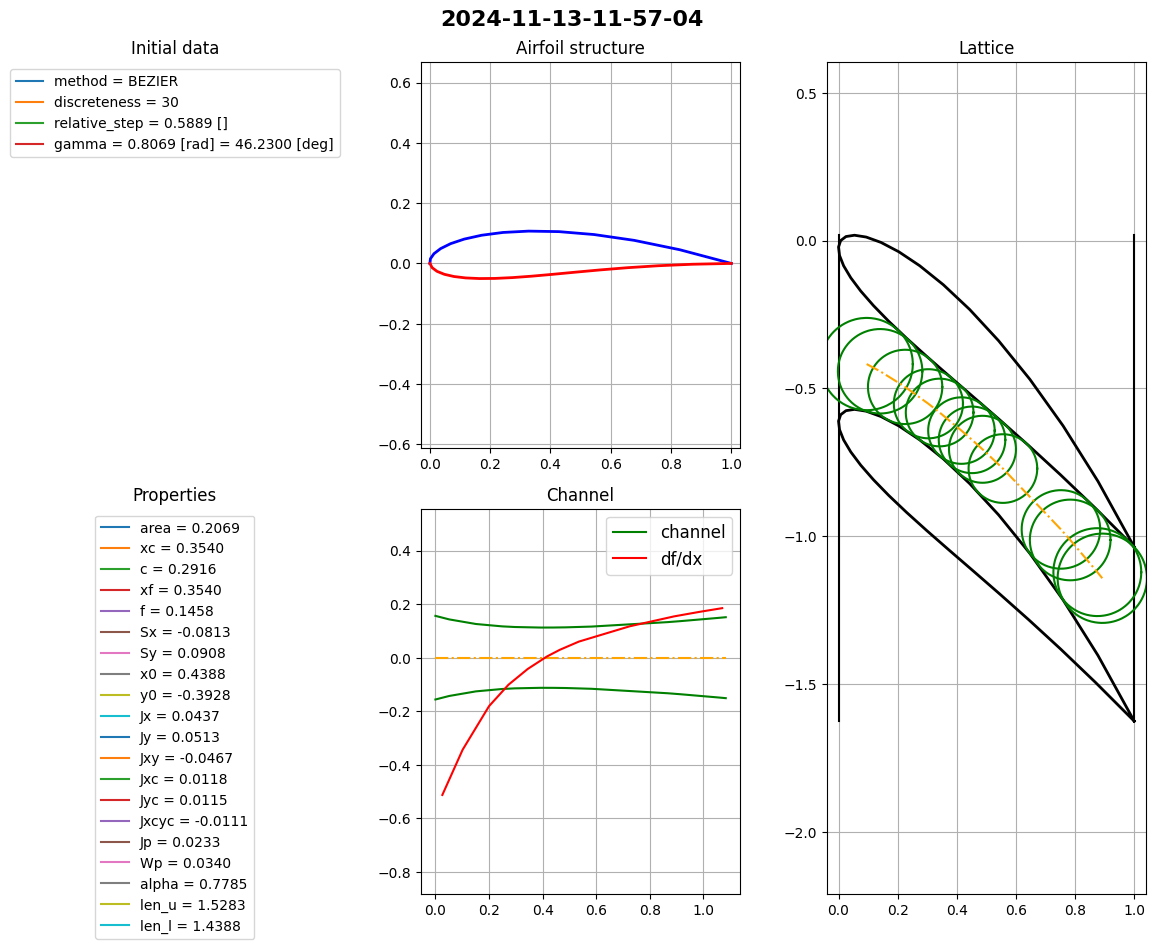

In [28]:
foil_bezier.show()

CFD: 100%|██████████| 30/30 [00:00<00:00, 2726.47it/s]


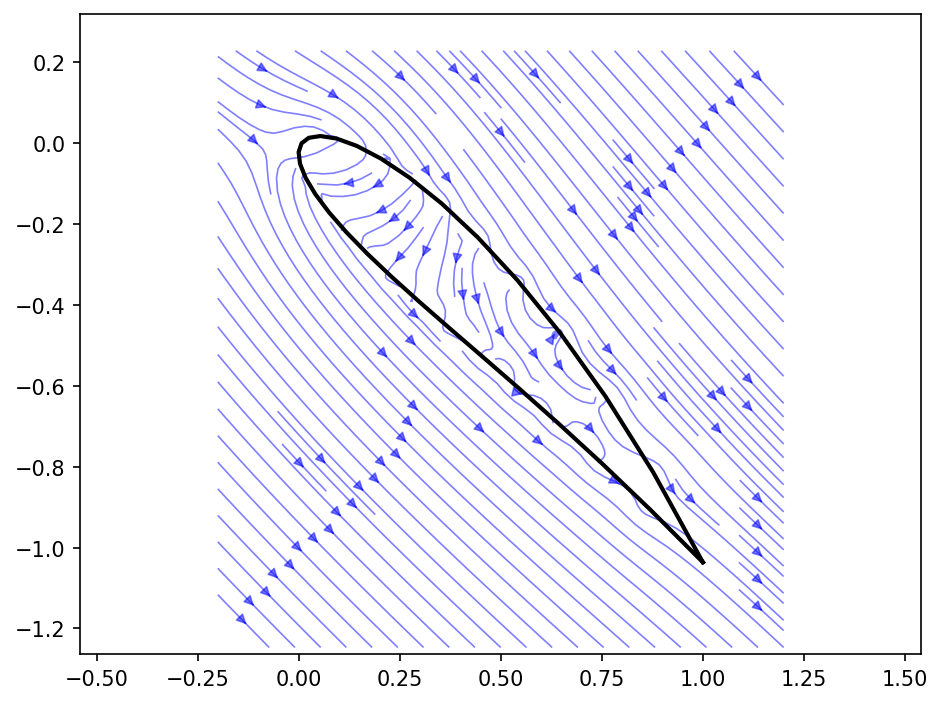

In [29]:
foil_bezier.cfd(20, -20)

In [30]:
foil_bezier.coordinates

((1.0, -1.036342794098287),
 (0.8774986551480665, -0.8142977717392372),
 (0.7593075637808191, -0.6263023334080464),
 (0.6468708244741356, -0.4688575597242537),
 (0.5413321563292561, -0.33877331973003955),
 (0.4436037377559713, -0.2331492456140099),
 (0.3544196894962635, -0.14935437530119736),
 (0.2743759827262081, -0.08500607691575117),
 (0.20395855307389604, -0.03794886912274919),
 (0.14356140139115603, -0.006233751355584351),
 (0.09349646211686596, 0.011901342064623547),
 (0.05399702006962105, 0.018049349911145776),
 (0.02521645650753987, 0.013649540128843719),
 (0.007224105292988476, -1.9771373467370464e-18),
 (0.0, -0.021733453607666552),
 (0.003430292802164997, -0.05051255791724891),
 (0.01730512597877528, -0.08542669584961185),
 (0.04132073687699625, -0.12569840956751308),
 (0.07508757716784702, -0.17069494996333145),
 (0.1181462272337661, -0.21994647609685164),
 (0.1699928865255419, -0.2731715185895543),
 (0.23011622072638435, -0.33031032098185775),
 (0.2980473465609183, -0.3915

In [31]:
foil_bezier.to_dataframe()

,x,y
0,1.000000,-1.036343e+00
1,0.877499,-8.142978e-01
2,0.759308,-6.263023e-01
3,0.646871,-4.688576e-01
4,0.541332,-3.387733e-01
5,0.443604,-2.331492e-01
6,0.354420,-1.493544e-01
7,0.274376,-8.500608e-02
8,0.203959,-3.794887e-02
9,0.143561,-6.233751e-03


In [32]:
foil_bezier.write('txt')

"properties" elapsed 0.0 seconds


## MANUAL

In [35]:
points = ((1.0, 0.0), (0.5, 0.15), (0.35, 0.150), (0.10, 0.110), (0.05, 0.08),
          (0.0, 0.0), 
          (0.05, -0.025), (0.35, -0.025), (0.5, 0.0), (0.8, 0.025), (1.0, 0.0))
deg = 3

In [36]:
foil_manual = Foil('MANUAL', 30, 1 / 1.698, radians(46.23), 
                   points=points, deg=deg)

"properties" elapsed 0.07 seconds


Channel calculation: 100%|██████████| 32/32 [00:00<00:00, 142.23it/s]


"channel" elapsed 0.3033 seconds
"properties" elapsed 0.0 seconds


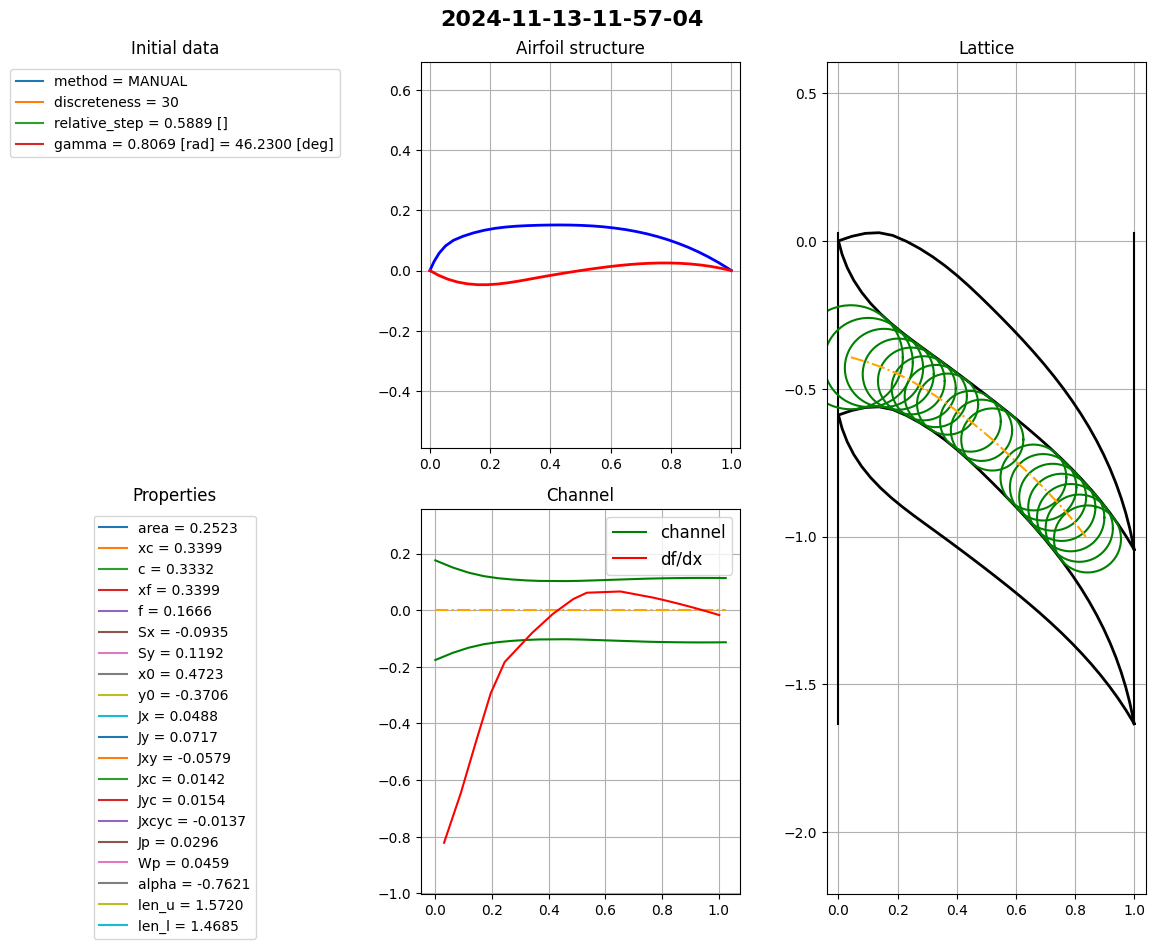

In [37]:
foil_manual.show()

In [38]:
foil_manual.properties

"properties" elapsed 0.0 seconds


{'area': 0.25234128441586234,
 'xc': np.float64(0.33993399339933994),
 'c': np.float64(0.33319980004408456),
 'xf': np.float64(0.33993399339933994),
 'f': np.float64(0.16659990002204228),
 'Sx': -0.09351860100560941,
 'Sy': 0.11918787747831247,
 'x0': 0.4723280923064852,
 'y0': -0.370603649823266,
 'Jx': 0.04882823436934671,
 'Jy': 0.07174313843967124,
 'Jxy': -0.057883972716972175,
 'Jxc': 0.014169899510302113,
 'Jyc': 0.015447355644280819,
 'Jxcyc': -0.013712510308821327,
 'Jp': 0.029617255154582932,
 'Wp': np.float64(0.04593149178503657),
 'alpha': np.float64(-0.7621250097096213),
 'len_u': 1.5719652209470183,
 'len_l': 1.4684637753143344}

CFD: 100%|██████████| 63/63 [00:00<00:00, 3150.42it/s]


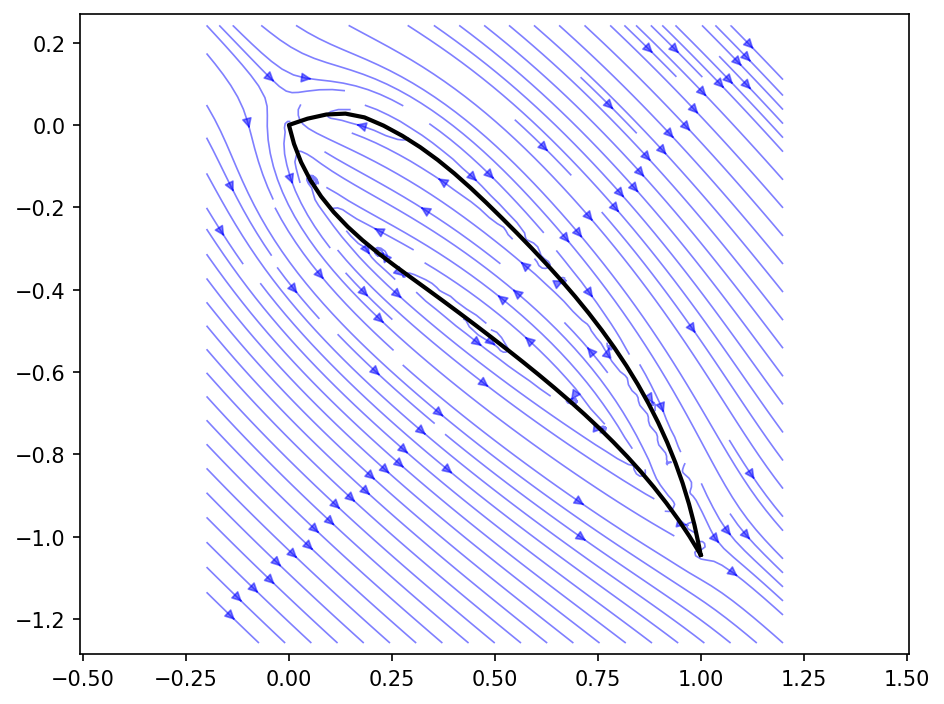

In [39]:
foil_manual.cfd(20, -20)

In [40]:
foil_manual.coordinates

((1.0, -1.043883921460576),
 (0.9962378106830471, -1.0237382428083404),
 (0.9850362247395383, -0.9718829593160663),
 (0.9716997810304887, -0.9205814883350399),
 (0.9562065798112469, -0.8699429087390306),
 (0.9385593192285697, -0.8200734911368143),
 (0.9187868875446652, -0.7710718427223259),
 (0.8969444669864406, -0.7230240479177255),
 (0.8731120760246276, -0.6759993129011576),
 (0.8473917049832169, -0.6300465696140831),
 (0.8199033986130407, -0.5851923488321621),
 (0.7907807599098148, -0.5414400317733354),
 (0.7601663706849809, -0.4987703894962069),
 (0.7282075568554018, -0.4571431661504724),
 (0.6950528031940127, -0.41649938095383404),
 (0.6608489826804044, -0.3767640143640469),
 (0.6257394413100325, -0.3378487882754553),
 (0.5898628877904745, -0.2996548235352047),
 (0.5533529828717424, -0.2620750385447975),
 (0.5163384998825142, -0.22499622530190472),
 (0.47891016810666015, -0.18834460045640924),
 (0.44082565947262775, -0.15241399155705487),
 (0.4016932442956965, -0.11770652209154432

In [41]:
foil_manual.to_dataframe()

,x,y
0,1.000000,-1.043884
1,0.996238,-1.023738
2,0.985036,-0.971883
3,0.971700,-0.920581
4,0.956207,-0.869943
...,...,...
58,0.916726,-0.918270
59,0.945519,-0.958004
60,0.972740,-0.998885
61,0.998276,-1.040897


In [42]:
foil_manual.write('txt')

"properties" elapsed 0.0 seconds


# CIRCLE (airfoil)

In [44]:
foil_circle_airfoil = Foil('CIRCLE', 60, 0.5, radians(30), 
                           relative_circles = ((0.1, 0.04),
                                               (0.2, 0.035),
                                               (0.3, 0.03),
                                               (0.4, 0.028),
                                               (0.5, 0.025),
                                               (0.6, 0.02),),
                                               rotation_angle = radians(40),
                                               x_ray_cross = 0.5,
                                               is_airfoil = True)

"properties" elapsed 0.1887 seconds


Channel calculation: 100%|██████████| 61/61 [00:00<00:00, 171.82it/s]


"channel" elapsed 0.5497 seconds
"properties" elapsed 0.0 seconds


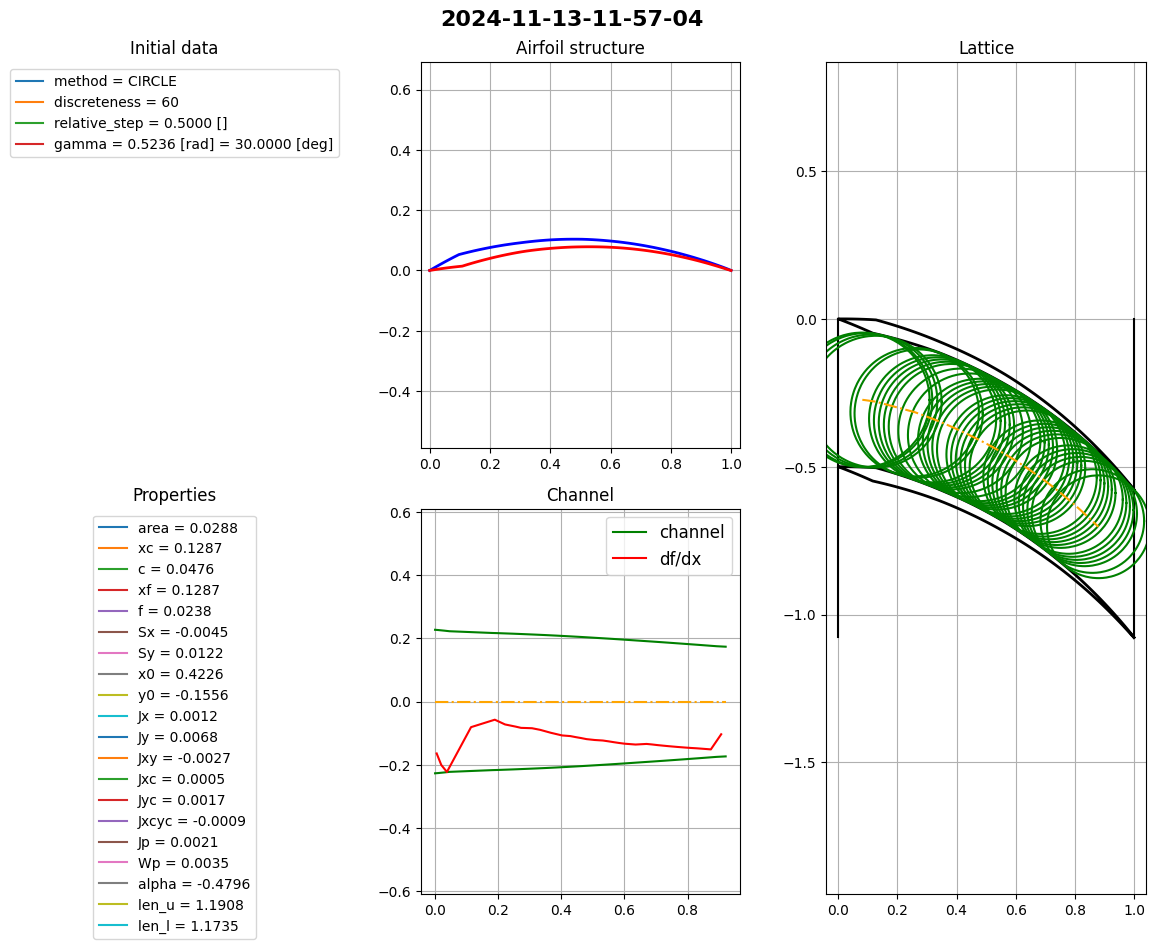

In [45]:
foil_circle_airfoil.show()

In [46]:
foil_circle_airfoil.properties

"properties" elapsed 0.0 seconds


{'area': 0.028819090907257736,
 'xc': np.float64(0.12871287128712872),
 'c': np.float64(0.047615830395383564),
 'xf': np.float64(0.12871287128712872),
 'f': np.float64(0.023807915197691782),
 'Sx': -0.004484374225341282,
 'Sy': 0.012180068181607474,
 'x0': 0.4226388757648172,
 'y0': -0.15560429160560188,
 'Jx': 0.0011597853224429345,
 'Jy': 0.006805797662926278,
 'Jxy': -0.0027480304133956275,
 'Jxc': 0.0004619974478142846,
 'Jyc': 0.0016580273399128742,
 'Jxcyc': -0.000852759532288665,
 'Jp': 0.0021200247877271585,
 'Wp': np.float64(0.0035454171977102188),
 'alpha': np.float64(-0.47960915526635567),
 'len_u': 1.1907604770647136,
 'len_l': 1.1735302317911693}

CFD: 100%|██████████| 123/123 [00:02<00:00, 56.22it/s]


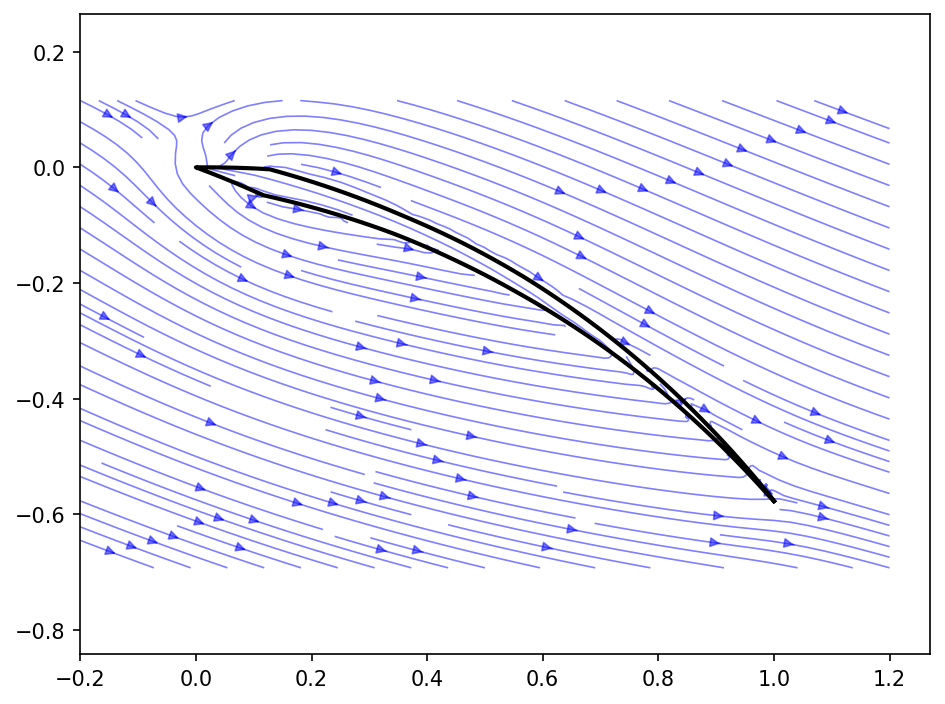

In [47]:
foil_circle_airfoil.cfd(15, -5)

In [48]:
foil_circle_airfoil.coordinates

((1.0, -0.5773502691896256),
 (0.992543539101698, -0.5671248823292375),
 (0.980041745206302, -0.5518810933951191),
 (0.9673792226072696, -0.536765155833491),
 (0.9545555096373861, -0.5217801711847726),
 (0.9415702305077099, -0.506929266306748),
 (0.9284230991618303, -0.49221558953956274),
 (0.9151139230421856, -0.4776423065951268),
 (0.901642606744978, -0.46321259617479804),
 (0.8880091555361161, -0.4489296453180477),
 (0.8742136787043816, -0.43479664449203415),
 (0.8602563927217709, -0.4208167824285663),
 (0.8461376241865989, -0.40699324072368387),
 (0.8318578125195717, -0.39332918821238105),
 (0.8174175123869135, -0.379827775137386),
 (0.802817395824806, -0.36649212713311713),
 (0.7880582540376301, -0.3533253390462374),
 (0.7731409988458484, -0.34033046861892635),
 (0.7580666637641973, -0.3275105300660974),
 (0.7428364046840511, -0.31486848757268987),
 (0.7274515001447273, -0.3024072487467785),
 (0.7119133511783856, -0.29012965806357716),
 (0.6962234807134896, -0.27803849033502365),


In [49]:
foil_circle_airfoil.to_dataframe()

,x,y
0,1.000000,-0.577350
1,0.992544,-0.567125
2,0.980042,-0.551881
3,0.967379,-0.536765
4,0.954556,-0.521780
...,...,...
118,0.951189,-0.524832
119,0.964666,-0.539173
120,0.977992,-0.553661
121,0.991168,-0.568294


In [50]:
foil_circle_airfoil.write('txt')

"properties" elapsed 0.0 seconds


# CIRCLE (channel)

In [51]:
foil_circle_channel = Foil('CIRCLE', 60, 0.5, radians(30),
                           relative_circles = ((0.1, 0.4),
                                               (0.2, 0.4),
                                               (0.3, 0.4),
                                               (0.4, 0.4),
                                               (0.5, 0.4),
                                               (0.6, 0.4),
                                               (0.8, 0.4),
                                               (0.9, 0.4),),
                                               rotation_angle = radians(40),
                                               x_ray_cross = 0.5,
                                               is_airfoil = False)

"properties" elapsed 0.1309 seconds


Channel calculation: 100%|██████████| 61/61 [00:00<00:00, 175.03it/s]


"channel" elapsed 0.4887 seconds
"properties" elapsed 0.0 seconds


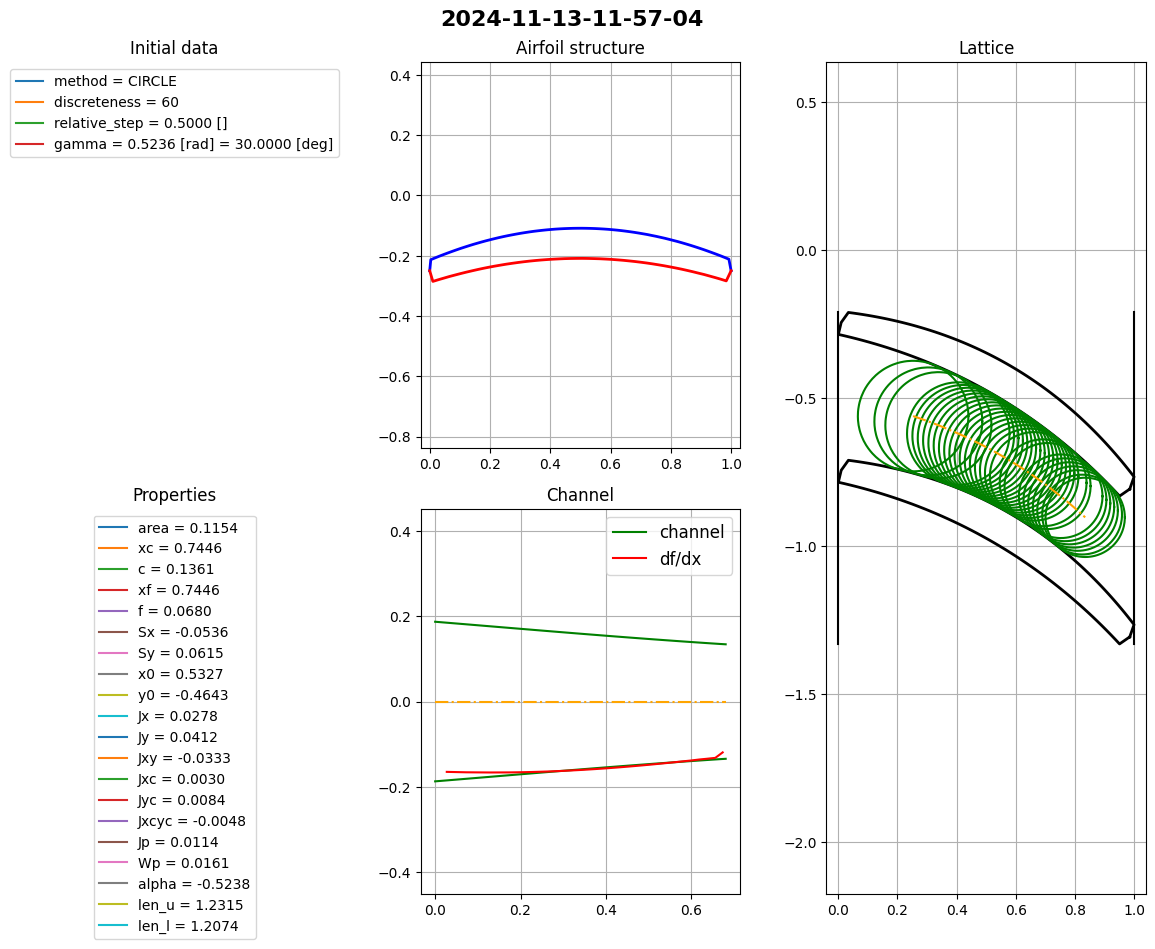

In [52]:
foil_circle_channel.show()

In [53]:
foil_circle_channel.properties

"properties" elapsed 0.0 seconds


{'area': 0.11536329815488904,
 'xc': np.float64(0.7445744574457446),
 'c': np.float64(0.13607313569494695),
 'xf': np.float64(0.7445744574457446),
 'f': np.float64(0.06803656784747347),
 'Sx': -0.05356346539943007,
 'Sy': 0.061450750226561546,
 'x0': 0.5326715793445551,
 'y0': -0.4643024796977866,
 'Jx': 0.027822070689487506,
 'Jy': 0.041170491530169454,
 'Jxy': -0.03328645353695349,
 'Jxc': 0.0029524208833255315,
 'Jyc': 0.00843742335507914,
 'Jxcyc': -0.004754717827471642,
 'Jp': 0.01138984423840467,
 'Wp': np.float64(0.016118704322121064),
 'alpha': np.float64(-0.5238067544006616),
 'len_u': 1.2315005909296022,
 'len_l': 1.2073677370416107}

CFD: 100%|██████████| 125/125 [00:02<00:00, 59.52it/s]


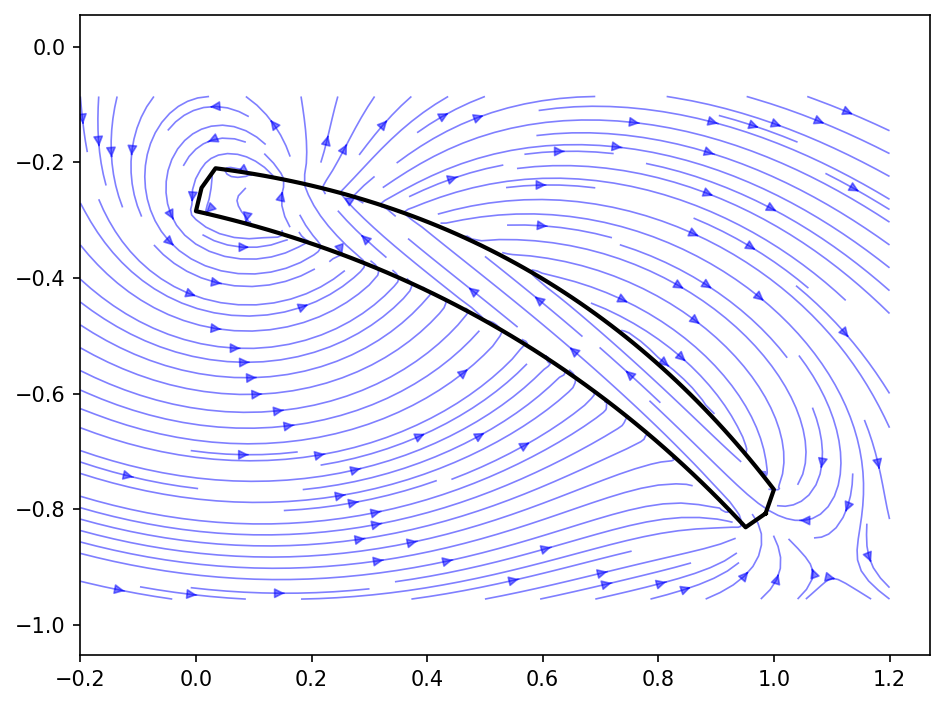

In [54]:
foil_circle_channel.cfd(15, -5)

In [55]:
foil_circle_channel.coordinates

((0.9855313503379971, -0.8073451786470088),
 (1.0, -0.7659126792156445),
 (0.9895843223683867, -0.7524710732226845),
 (0.9790528912149055, -0.7391547856099098),
 (0.968405536064888, -0.7259659557378791),
 (0.9576421237025153, -0.7129067131407344),
 (0.9467625587809845, -0.6999791747354975),
 (0.9357667842900691, -0.6871854418968056),
 (0.924654782059759, -0.6745275976240636),
 (0.9134265730892102, -0.6620077035631684),
 (0.9020822178595995, -0.6496277970841496),
 (0.8906218165581624, -0.6373898883409571),
 (0.8790455092514056, -0.6252959573675855),
 (0.8673534759674116, -0.6133479511784987),
 (0.8555459367554665, -0.6015477809554155),
 (0.8436231516395861, -0.5898973192434864),
 (0.8315854205733768, -0.5783983972747879),
 (0.8194330833039867, -0.5670528023336948),
 (0.8071665192321316, -0.555862275256203),
 (0.7947861472289445, -0.5448285080290094),
 (0.7822924254082413, -0.5339531414933163),
 (0.769685850908358, -0.5232377632050028),
 (0.7569669596722148, -0.5126839054401335),
 (0.744

In [56]:
foil_circle_channel.to_dataframe()

,x,y
0,0.985531,-0.807345
1,1.000000,-0.765913
2,0.989584,-0.752471
3,0.979053,-0.739155
4,0.968406,-0.725966
...,...,...
120,0.906036,-0.784242
121,0.921224,-0.799762
122,0.936224,-0.815432
123,0.951036,-0.831249


In [57]:
foil_circle_channel.write('txt')

"properties" elapsed 0.0 seconds
